In [39]:
# In this notebook, we explore the basic properties of the InstaCart datasets. Our
# mission here is to:
#   1. Familiarize ourselves with the structure of the data sets,
#   2. Understand basic statistics about the data, to get a feel for
#      what we might be able to do with the data
#   3. Assess data quality and perform basic sanity checks. Do the data
#      agree with the claimed specs? Are values missing? Are some values
#      clearly insane and need to be removed?
#   4. Develop a baseline strategy for answering the data challenge.
#

#
# This script continues from basket_sizes.ipynb. We give broad overview statistics
# of how much information we have about the individual users.
#

In [40]:
import pandas as pd
import numpy as np
from math import factorial

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (10, 6)

In [42]:
print "Reading orders data ... ",

# The raw data take about 750Mb total on disk.
prior = pd.read_csv('order_products__prior.csv')
train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
departments = pd.read_csv('departments.csv')
products = pd.read_csv('products.csv')
prior = prior.merge(orders, on='order_id', how='left')

print "done."

Reading orders data ...  done.


In [43]:
#
# How many order history do we have per user?
#

# number of orders per user
norders = prior.groupby('user_id').apply(lambda x: len(set(x['order_id'])))

# number of products orders per user
nproducts = prior.groupby('user_id').apply(len) 

# number of unique product per user
u_nproducts = prior.groupby('user_id').apply(lambda x: len(set['product_id']))

# basic summary statistics
pctiles_ord = list(norders.quantile([0.1, 0.5, 0.9, 0.99]))
pctiles_prod = list(nproducts.quantile([0.1, 0.5, 0.9, 0.99]))
pctiles_uprod = list(u_nproducts.quantile([0.1, 0.5, 0.9, 0.99]))
print "Total users:", len(norders)
print
print "Min prev orders:", min(norders)
print "Max prev orders:", max(norders)
print "Percentiles:"
print "\t10:", pctiles_ord[0]
print "\t50:", pctiles_ord[1]
print "\t90:", pctiles_ord[2]
print "\t99:", pctiles_ord[3]
print "Avg prev orders: %.3f" % norders.mean()
print
print "Min prevly ordered products:", min(nproducts)
print "Max prevly ordered products:", max(nproducts)
print "Percentiles:"
print "\t10:", pctiles_prod[0]
print "\t50:", pctiles_prod[1]
print "\t90:", pctiles_prod[2]
print "\t99:", pctiles_prod[3]
print "Avg prevly ordered products: %.3f" % nproducts.mean()
print
print "Min unique prevly ordered products:", min(u_nproducts)
print "Max unique prevly ordered products:", max(u_nproducts)
print "Percentiles:"
print "\t10:", pctiles_uprod[0]
print "\t50:", pctiles_uprod[1]
print "\t90:", pctiles_uprod[2]
print "\t99:", pctiles_uprod[3]
print "Avg unique prevly ordered products: %.3f" % u_nproducts.mean()

TypeError: 'type' object has no attribute '__getitem__'

In [7]:
#
# Note that the order history is in the range [3, 99], not [4, 100], as claimed in
# in the challenge description. This is because Kaggle is counting the *train* and
# *test* orders, which from a model development point of view don't count to me.
#

#
# Note also that the worst case scenario is achieved -- a user that has only ever
# purchased three items!!
#

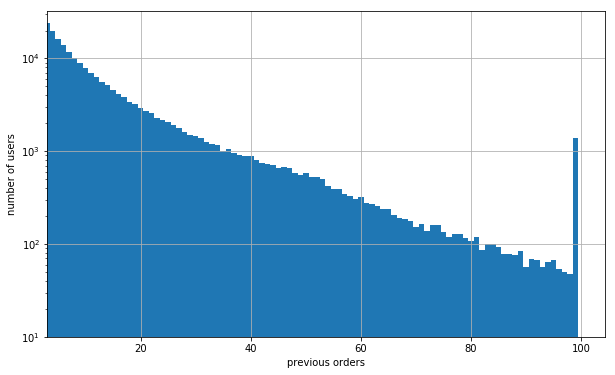

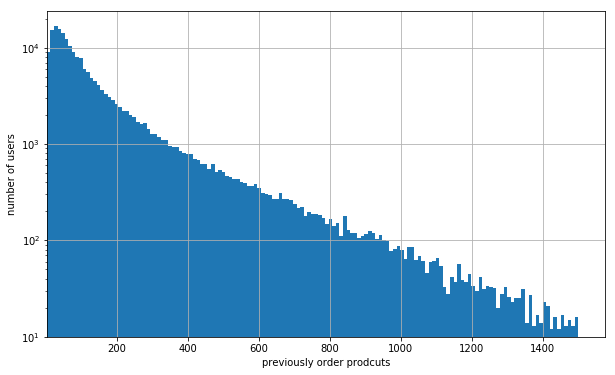

In [16]:
# a visualization of the data from the above cells
bins = np.linspace(2.5, 99.5, 98)
ax = plt.gca()
n, bins, patches = ax.hist(norders, bins=bins, log = True)
plt.xlabel('previous orders')
plt.ylabel('number of users')
plt.grid()
plt.xlim(xmin=3)
plt.ylim(ymin=10)
plt.show()


bins = np.linspace(2.5, 1500.5, 150)
ax = plt.gca()
n, bins, patches = ax.hist(nproducts, bins=bins, log = True)
plt.xlabel('previously ordered prodcuts')
plt.ylabel('number of users')
plt.grid()
plt.xlim(xmin=3)
plt.ylim(ymin=10)
plt.show()

In [ ]:
#
# Hmmm... the number of previous orders looks a lot like the basket size
# plot. I have no further deep insights here. I will simply note the global
# takeaway lesson here: 
#
#     The quantity of our user data falls off in a power-law fashion.
#

In [36]:
# let's check out quickly some two-D statistics
norders = norders.reset_index(name='norders')
nproducts = nproducts.reset_index(name='nproducts')

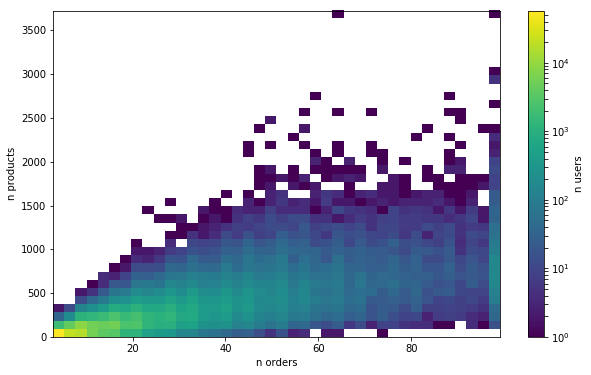

In [38]:
from matplotlib.colors import LogNorm

x = norders.merge(nproducts, on='user_id', how='left')
plt.hist2d(x['norders'], x['nproducts'], bins = 40, norm=LogNorm())
plt.colorbar().set_label('n users')
plt.xlabel('n orders')
plt.ylabel('n products')
plt.show()

In [ ]:
# I was looking to see some sort of correlation like "those that order more 
# tend to order more per order", but I don't see it. In fact, it looks like
# the average products per order is independent of how many previous orders
# the customer made.